### This notebook will demo the data augmentation features found in `nussl.core.augmentation`

To use, clone my fork of nussl at 

In [1]:
import nussl
import nussl.core.augmentation as augment
from nussl.datasets.hooks import MUSDB18
import matplotlib.pyplot as plt

musdb = MUSDB18()
mix_and_sources = musdb.process_item(0)
mix = mix_and_sources["mix"]

/home/abugler/.conda/envs/nussl/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/abugler/.conda/envs/nussl/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


This is what the unaltered track sounds like, as well as the spectrogram.

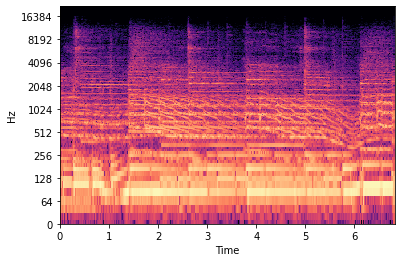

In [2]:
mix.embed_audio()
nussl.utils.visualize_spectrogram(mix, y_axis="log")

### Time stretching
`augment.time_stretch(audio_signal, stretch_factor)`


Stretches the audio signal by a factor of `stretch factor`. For example, when `stretch_factor=2`, then the audio_data becomes two times faster, and when `stretch_factor=.5`, then the audio_data becomes two times slower. 

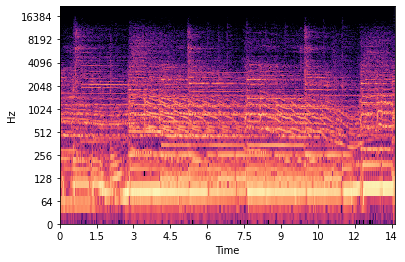

In [3]:
# Slower
fast_mix = augment.time_stretch(mix, .5)
fast_mix.embed_audio()
nussl.utils.visualize_spectrogram(fast_mix, y_axis="log")

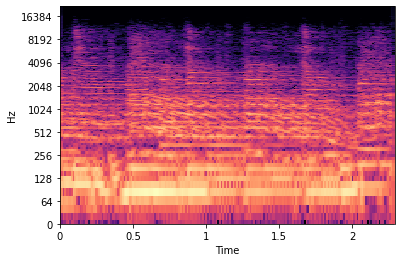

In [4]:
# Faster
fast_mix = augment.time_stretch(mix, 3)
fast_mix.embed_audio()
nussl.utils.visualize_spectrogram(fast_mix, y_axis="log")

### Pitch Shifting 

`augment.pitch_shift(audio_signal, shift)`

Shifts the pitches up by `shift` half steps. If `shift` is negative, the audio is shifted down.

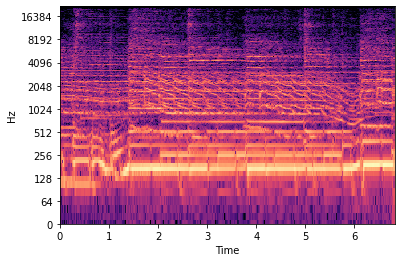

In [5]:
# Higher
high_mix = augment.pitch_shift(mix, 12)
high_mix.embed_audio()
nussl.utils.visualize_spectrogram(high_mix, y_axis="log")

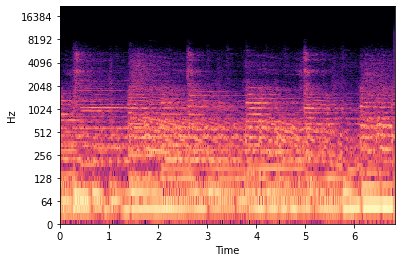

In [6]:
# Lower
low_mix = augment.pitch_shift(mix, -12)
low_mix.embed_audio()
nussl.utils.visualize_spectrogram(low_mix, y_axis="log")

### Low pass and high pass

`augment.low_pass(audio_signal, highest_freq)`

`augment.high_pass(audio_signal, lowest_freq)`

Implements low and high pass, where `highest_freq` and `lowest_freq` represent the thresholds of each filter respectively.

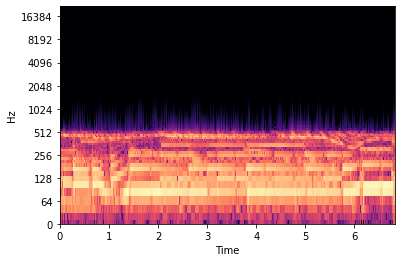

In [7]:
# Low pass
low_pmix = augment.low_pass(mix, 512)
low_pmix.embed_audio()
nussl.utils.visualize_spectrogram(low_pmix, y_axis="log")

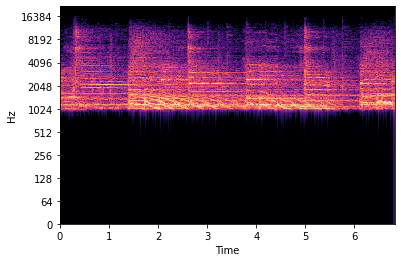

In [8]:
# High pass
high_pmix = augment.high_pass(mix, 1024)
high_pmix.embed_audio()
nussl.utils.visualize_spectrogram(high_pmix, y_axis="log")

### Tremolo and Vibrato

`augment.tremolo(audio_signal, mod_freq,mod_depth)`

`augment.vibrato(audio_signal, mod_freq,mod_depth)`

Applys tremolo/vibrato filter on the audio signal, with a modulation frequency of `mod_freq` Hz, and modulation amplitude of `mod_depth`.

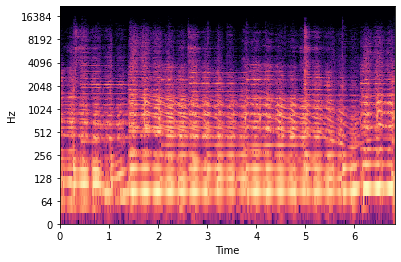

In [9]:
# tremolo
trem_mix = augment.tremolo(mix, 4, .7)
trem_mix.embed_audio()
nussl.utils.visualize_spectrogram(trem_mix, y_axis="log")

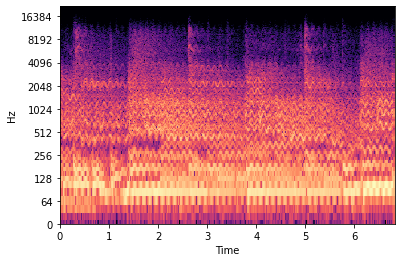

In [10]:
# vibrato
vib_mix = augment.vibrato(mix, 8, .7)
vib_mix.embed_audio()
nussl.utils.visualize_spectrogram(vib_mix, y_axis="log")

### Echo
`augment.echo(audio_signal, in_gain, out_gain, delays, decays)`
Applies echo filter. `in_gain` and `out_gain` are the input and output gain of the reflected signal. `delays` and `decays` are the delay in milliseconds and relative amplitude for each echo, respectively.

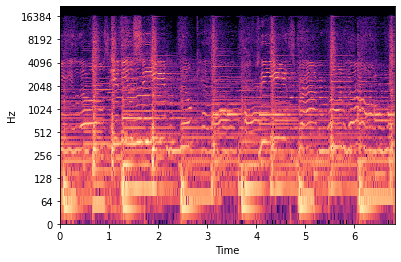

In [11]:
# We chose a different song, since the echo is tough to hear with the previous song
mix_and_sources = musdb.process_item(10)
mix = mix_and_sources["mix"]
mix.embed_audio()
nussl.utils.visualize_spectrogram(mix, y_axis="log")

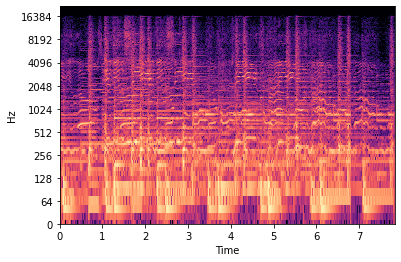

In [16]:
# This sounds like an open air concert in the mountains
echo_mix = augment.echo(mix, .4, 1, [1000], [.3])
echo_mix.embed_audio()
nussl.utils.visualize_spectrogram(echo_mix, y_axis="log")

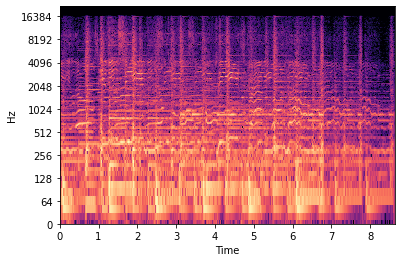

In [13]:
# Same as above, but with one more mountain
echo2_mix = augment.echo(mix, .8, .9, [1000, 1800], [.3, .25])
echo2_mix.embed_audio()
nussl.utils.visualize_spectrogram(echo2_mix, y_axis="log")

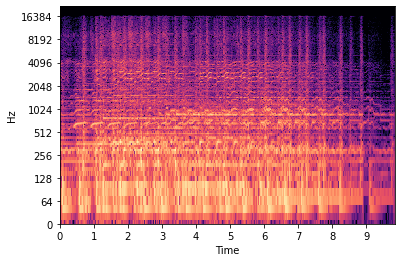

In [18]:
# Concert in a cave
delays = [500, 1000, 1500, 2100, 3000]
decays = [.5, .4, .3, .2, .1]
echomany_mix = augment.echo(mix, .5, .9, delays, decays)
echomany_mix.embed_audio()
nussl.utils.visualize_spectrogram(echomany_mix, y_axis="log")

### Emphasis
`TODO: Make this description`

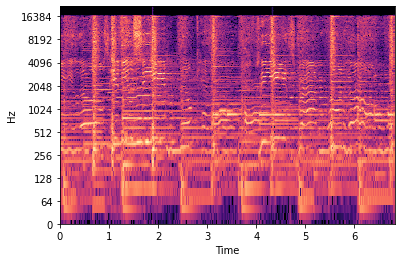

In [19]:
level_in = 1
level_out = .8
_type = "riaa"
riaa_mix = augment.emphasis(mix, level_in, level_out, _type)
riaa_mix.embed_audio()
nussl.utils.visualize_spectrogram(riaa_mix, y_axis="log")

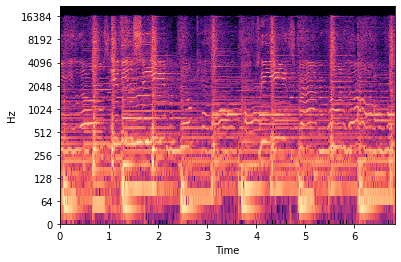

In [20]:
_type = "cd"
riaa_mix = augment.emphasis(mix, level_in, level_out, _type)
riaa_mix.embed_audio()
nussl.utils.visualize_spectrogram(riaa_mix, y_axis="log")

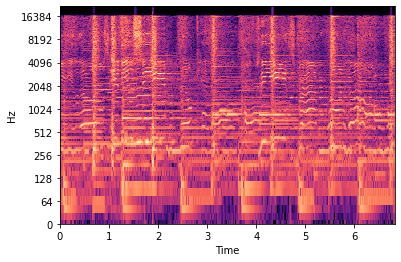

In [21]:
_type = "col"
riaa_mix = augment.emphasis(mix, level_in, level_out, _type)
riaa_mix.embed_audio()
nussl.utils.visualize_spectrogram(riaa_mix, y_axis="log")